# DBSCAN 

Hands on! Another notebook??? Yes. More toy data? Yes!. Can you guess why? In real life, many datasets are not linearly separable, neither have clear shapes. Datasets for DBSCAN are hard to find, but it usually works great for spacial data. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler

## Dataset '0'

In [3]:
df = pd.read_csv("0",header=None,delim_whitespace=True)

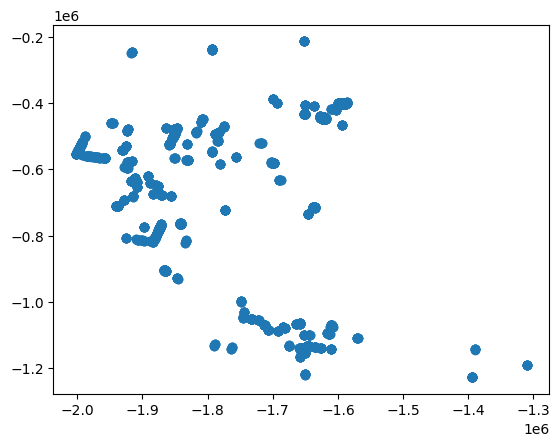

In [4]:
plt.scatter(df[0], df[1])
plt.show()

In [5]:
#Check the data, is there a need for any preprocessing? Yes, scale is awful
X = df.to_numpy()

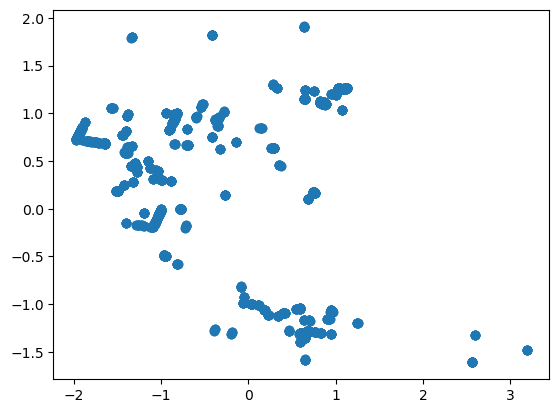

In [6]:
X = StandardScaler().fit_transform(df)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [7]:
# The challenge here is how to chose the two values for DBSCAN. Remember that it will find the number of clusters, 
# but we need to specify how many points should be in the neighbourhood of eps radius.
clustering = DBSCAN(eps=0.5, min_samples=3).fit(X)

In [8]:
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Estimated number of clusters: 7
Estimated number of noise points: 0
Silhouette Coefficient: 0.228


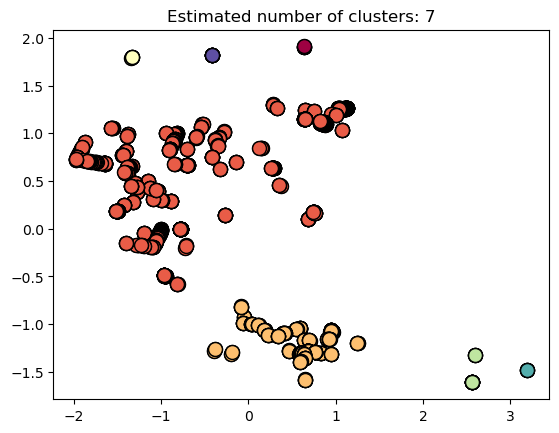

In [9]:
#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

### Best hyperparameters

In [10]:
# Range of values for eps and samples
eps_range = [0.3, 0.4, 0.5, 0.75, 1, 1.5]
min_samples_range = [2, 3, 4, 5, 6]

# Iterate through all combinations of eps and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        
        # Fit DBSCAN with the current hyperparameters
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        
        
        labels = clustering.labels_
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        #Checks for two distinct labels
        if len(np.unique(labels)) > 1:
            # Calculate the silhouette score
            score=metrics.silhouette_score(X, labels)
            print(f"eps={eps:.2f}, min_samples={min_samples}, silhouette_score={score:.2f}, ", "clusters: %d, " % n_clusters_, "noise points: %d, " % n_noise_)
            #print("Estimated number of clusters: %d" % n_clusters_)
            #print("Estimated number of noise points: %d" % n_noise_)

eps=0.30, min_samples=2, silhouette_score=0.56,  clusters: 17,  noise points: 0, 
eps=0.30, min_samples=3, silhouette_score=0.56,  clusters: 17,  noise points: 0, 
eps=0.30, min_samples=4, silhouette_score=0.56,  clusters: 17,  noise points: 0, 
eps=0.30, min_samples=5, silhouette_score=0.56,  clusters: 17,  noise points: 0, 
eps=0.30, min_samples=6, silhouette_score=0.56,  clusters: 17,  noise points: 0, 
eps=0.40, min_samples=2, silhouette_score=0.48,  clusters: 10,  noise points: 0, 
eps=0.40, min_samples=3, silhouette_score=0.48,  clusters: 10,  noise points: 0, 
eps=0.40, min_samples=4, silhouette_score=0.48,  clusters: 10,  noise points: 0, 
eps=0.40, min_samples=5, silhouette_score=0.48,  clusters: 10,  noise points: 0, 
eps=0.40, min_samples=6, silhouette_score=0.48,  clusters: 10,  noise points: 0, 
eps=0.50, min_samples=2, silhouette_score=0.23,  clusters: 7,  noise points: 0, 
eps=0.50, min_samples=3, silhouette_score=0.23,  clusters: 7,  noise points: 0, 
eps=0.50, min_samp

eps=0.75, min_samples=3, silhouette_score=0.40,  clusters: 4,  noise points: 0, 


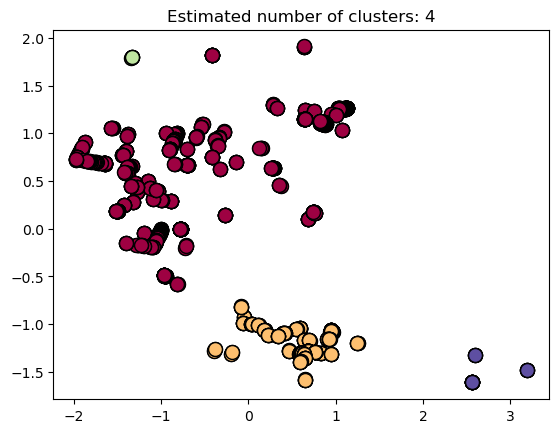

In [11]:
# Fit DBSCAN with the current hyperparameters
eps, min_samples=0.75,3
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        
labels = clustering.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
score=metrics.silhouette_score(X, labels)
print(f"eps={eps:.2f}, min_samples={min_samples}, silhouette_score={score:.2f}, ", "clusters: %d, " % n_clusters_, "noise points: %d, " % n_noise_)

#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

## Dataset '91'

(636, 2)


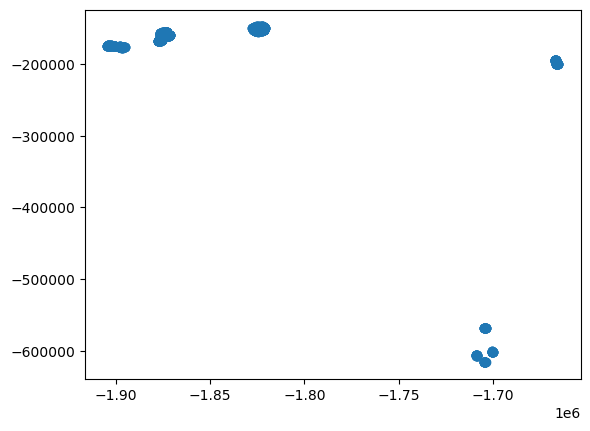

In [12]:
df = pd.read_csv("91",header=None,delim_whitespace=True)
print(df.shape)
plt.scatter(df[0], df[1])
plt.show()

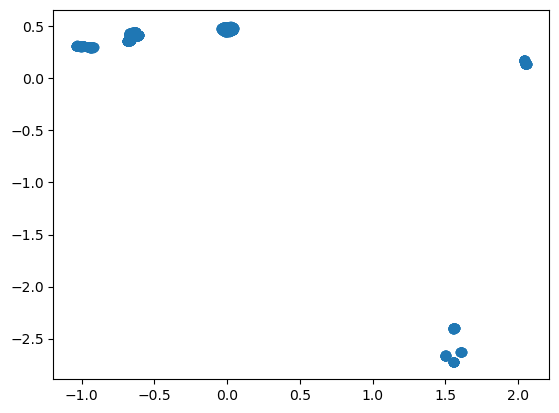

In [13]:
# Scaling
X = df.to_numpy()
X = StandardScaler().fit_transform(df)
plt.scatter(X[:,0], X[:,1])
plt.show()

### Best Hyperparameters

In [14]:
# Range of values for eps and samples
eps_range = [0.2, 0.3, 0.4, 0.5, 0.75]
min_samples_range = [2, 3, 4, 5, 6]

# Iterate through all combinations of eps and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        
        # Fit DBSCAN with the current hyperparameters
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        
        
        labels = clustering.labels_
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        #Checks for two distinct labels
        if len(np.unique(labels)) > 1:
            # Calculate the silhouette score
            score=metrics.silhouette_score(X, labels)
            print(f"eps={eps:.2f}, min_samples={min_samples}, silhouette_score={score:.2f}, ", "clusters: %d, " % n_clusters_, "noise points: %d, " % n_noise_)
            #print("Estimated number of clusters: %d" % n_clusters_)
            #print("Estimated number of noise points: %d" % n_noise_)

eps=0.20, min_samples=2, silhouette_score=0.89,  clusters: 6,  noise points: 0, 
eps=0.20, min_samples=3, silhouette_score=0.89,  clusters: 6,  noise points: 0, 
eps=0.20, min_samples=4, silhouette_score=0.89,  clusters: 6,  noise points: 0, 
eps=0.20, min_samples=5, silhouette_score=0.89,  clusters: 6,  noise points: 0, 
eps=0.20, min_samples=6, silhouette_score=0.89,  clusters: 6,  noise points: 0, 
eps=0.30, min_samples=2, silhouette_score=0.86,  clusters: 4,  noise points: 0, 
eps=0.30, min_samples=3, silhouette_score=0.86,  clusters: 4,  noise points: 0, 
eps=0.30, min_samples=4, silhouette_score=0.86,  clusters: 4,  noise points: 0, 
eps=0.30, min_samples=5, silhouette_score=0.86,  clusters: 4,  noise points: 0, 
eps=0.30, min_samples=6, silhouette_score=0.86,  clusters: 4,  noise points: 0, 
eps=0.40, min_samples=2, silhouette_score=0.86,  clusters: 4,  noise points: 0, 
eps=0.40, min_samples=3, silhouette_score=0.86,  clusters: 4,  noise points: 0, 
eps=0.40, min_samples=4, sil

eps=0.20, min_samples=5, silhouette_score=0.89,  clusters: 6,  noise points: 0, 


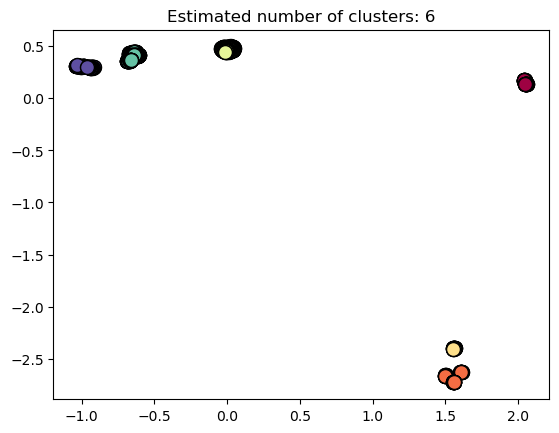

In [15]:
# Fit DBSCAN with the current hyperparameters
eps, min_samples=0.2,5
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        
labels = clustering.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
score=metrics.silhouette_score(X, labels)
print(f"eps={eps:.2f}, min_samples={min_samples}, silhouette_score={score:.2f}, ", "clusters: %d, " % n_clusters_, "noise points: %d, " % n_noise_)

#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

## Dataset '33'

(236896, 2)


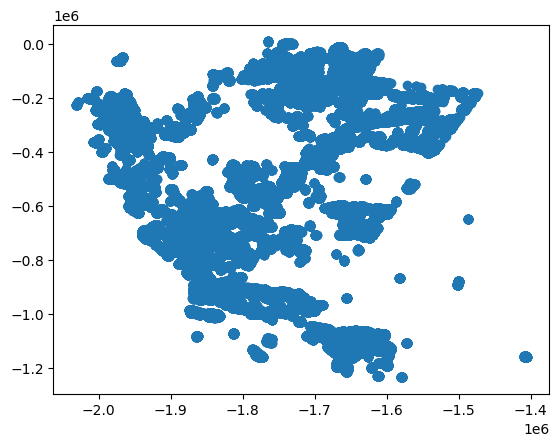

In [5]:
df = pd.read_csv("33",header=None,delim_whitespace=True)
print(df.shape)
plt.scatter(df[0], df[1])
plt.show()

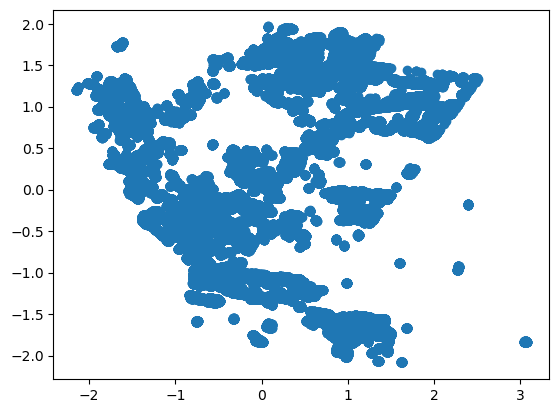

In [6]:
# Scaling
X = df.to_numpy()
X = StandardScaler().fit_transform(df)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
xp, test_dataset = train_test_split(X, test_size=0.9, random_state=42)

### Best Hyperparameters

In [14]:
# Range of values for eps and samples
eps_range = [0.5, 0.1, 1.5, 2]
min_samples_range = [2, 3, 4, 5, 6]

# Iterate through all combinations of eps and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        
        # Fit DBSCAN with the current hyperparameters
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(xp)
        
        
        labels = clustering.labels_
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        #Checks for two distinct labels
        if len(np.unique(labels)) > 1:
            # Calculate the silhouette score
            score=metrics.silhouette_score(xp, labels)
            print(f"eps={eps:.2f}, min_samples={min_samples}, silhouette_score={score:.2f}, ", "clusters: %d, " % n_clusters_, "noise points: %d, " % n_noise_)
            #print("Estimated number of clusters: %d" % n_clusters_)
            #print("Estimated number of noise points: %d" % n_noise_)

eps=0.50, min_samples=2, silhouette_score=0.13,  clusters: 5,  noise points: 0, 
eps=0.50, min_samples=3, silhouette_score=0.13,  clusters: 5,  noise points: 0, 
eps=0.50, min_samples=4, silhouette_score=0.13,  clusters: 4,  noise points: 3, 
eps=0.50, min_samples=5, silhouette_score=0.13,  clusters: 4,  noise points: 3, 
eps=0.50, min_samples=6, silhouette_score=0.35,  clusters: 1,  noise points: 18, 
eps=0.10, min_samples=2, silhouette_score=-0.26,  clusters: 45,  noise points: 6, 
eps=0.10, min_samples=3, silhouette_score=-0.25,  clusters: 40,  noise points: 16, 
eps=0.10, min_samples=4, silhouette_score=-0.24,  clusters: 34,  noise points: 34, 
eps=0.10, min_samples=5, silhouette_score=-0.23,  clusters: 31,  noise points: 46, 
eps=0.10, min_samples=6, silhouette_score=-0.22,  clusters: 25,  noise points: 76, 


eps=0.10, min_samples=4, silhouette_score=-0.24,  clusters: 34,  noise points: 34, 


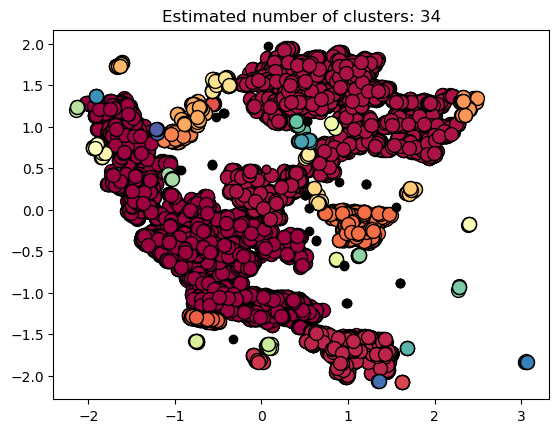

In [19]:
# Fit DBSCAN with the current hyperparameters
eps, min_samples=0.1, 4
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(xp)
        
labels = clustering.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
score=metrics.silhouette_score(xp, labels)
print(f"eps={eps:.2f}, min_samples={min_samples}, silhouette_score={score:.2f}, ", "clusters: %d, " % n_clusters_, "noise points: %d, " % n_noise_)

#Plot clusters
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = xp[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = xp[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()